# Deep Learning MNIST

## 1. Load packages and the MNIST data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


0


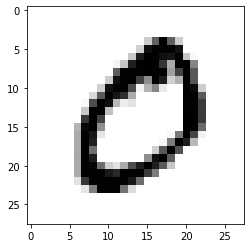

In [3]:
plt.imshow(X_train[1], cmap=plt.cm.binary)
print(y_train[1])

4


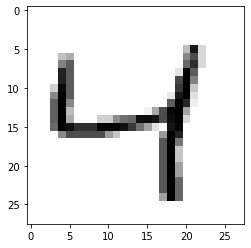

In [4]:
plt.imshow(X_train[2], cmap=plt.cm.binary)
print(y_train[2])

## 2. Preprocess the data to turn it into a binary classification problem.

In [5]:
# Filter training and test sets to 2 digits
digit0 = 3
digit1 = 8

train_ind = np.where((y_train == digit0) | (y_train == digit1))[0]
test_ind = np.where((y_test == digit0) | (y_test == digit1))[0]

y_train = y_train[train_ind]
X_train = X_train[train_ind]

y_test = y_test[test_ind]
X_test = X_test[test_ind]

# Relabel digit0 as 0 and digit 1 as 1 for binary classification
y_train[y_train == digit0] = 0
y_train[y_train == digit1] = 1
y_test[y_test == digit0] = 0
y_test[y_test == digit1] = 1

# Flatten
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.5, stratify=y_train, random_state=2019)

In [6]:
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

(5991, 784) (5991, 784) (1984, 784) (5991,) (5991,) (1984,)


## 3. Explore data. Plot a few images. 

In [7]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 255, 230,  54,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  1

0


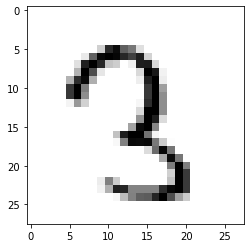

In [8]:
plt.imshow(X_train[3].reshape(28, 28), plt.cm.binary)
print(y_train[3])

## 4. Define a neural network. 

In [20]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(1, activation='sigmoid'))#out put between 0 and 1

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 16,141
Trainable params: 16,141
Non-trainable params: 0
_________________________________________________________________


In [21]:
784*20 + 20

15700

## 5. Compile and fit the network.

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=128, 
                    validation_data=(X_valid, y_valid)) 
#change the batch_size, need to redo step4

Train on 5991 samples, validate on 5991 samples
Epoch 1/20
5991/5991 [==============================] - 2s 356us/sample - loss: 4.7905 - accuracy: 0.8484 - val_loss: 1.1969 - val_accuracy: 0.9386
Epoch 2/20
5991/5991 [==============================] - 1s 89us/sample - loss: 0.9029 - accuracy: 0.9419 - val_loss: 0.7933 - val_accuracy: 0.9441
Epoch 3/20
5991/5991 [==============================] - 1s 107us/sample - loss: 0.5170 - accuracy: 0.9551 - val_loss: 0.6429 - val_accuracy: 0.9461
Epoch 4/20
5991/5991 [==============================] - 1s 100us/sample - loss: 0.3441 - accuracy: 0.9628 - val_loss: 0.5199 - val_accuracy: 0.9493
Epoch 5/20
5991/5991 [==============================] - 1s 92us/sample - loss: 0.2703 - accuracy: 0.9661 - val_loss: 0.4725 - val_accuracy: 0.9516
Epoch 6/20
5991/5991 [==============================] - 1s 110us/sample - loss: 0.2195 - accuracy: 0.9701 - val_loss: 0.4589 - val_accuracy: 0.9523
Epoch 7/20
5991/5991 [==============================] - 1s 95us/sa

## 6. Print accuracy on test set

In [23]:
# Loss (cross-entropy) and accuracy
print(model.metrics_names)
model.evaluate(X_test, y_test, verbose=0)

['loss', 'accuracy']


[0.3874025709828343, 0.9611895]

## 7. Evaluate how well it fit. Did it overfit the validation set?

In [24]:
model.history.history['val_accuracy']

[0.93857455,
 0.9440828,
 0.9460858,
 0.9492572,
 0.95159405,
 0.95226175,
 0.95242864,
 0.95426476,
 0.95660156,
 0.9556001,
 0.95810384,
 0.95660156,
 0.9576031,
 0.9569354,
 0.9579369,
 0.95643467,
 0.9591053,
 0.9589384,
 0.95927227,
 0.95810384]

In [25]:
history.history['accuracy'] #New version TF should include 'model.'

[0.84843934,
 0.9419129,
 0.95509934,
 0.9627775,
 0.96611583,
 0.97012186,
 0.97579706,
 0.979803,
 0.98197293,
 0.9844767,
 0.9834752,
 0.98948425,
 0.9893173,
 0.9931564,
 0.9923218,
 0.9941579,
 0.99649477,
 0.99682856,
 0.9971624,
 0.997997]

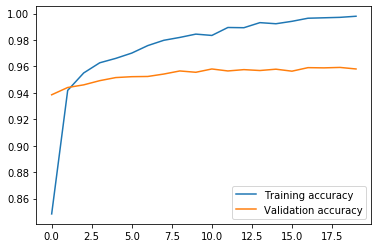

In [26]:
plt.plot(model.history.history['accuracy'], label='Training accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
#validation may good for new tests set

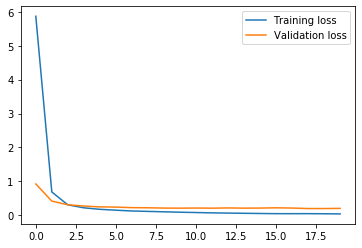

In [16]:
plt.plot(model.history.history['loss'], label='Training loss')
plt.plot(model.history.history['val_loss'], label='Validation loss')
plt.legend()

In [28]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1], )))#hidden layer can use any functions
model.add(Dense(20, activation='sigmoid', input_shape=(X_train.shape[1], )))#hidden layer can use any functions
model.add(Dense(1, activation='sigmoid'))#output layer: between 0 and 1

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 16,141
Trainable params: 16,141
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=128, 
                    validation_data=(X_valid, y_valid)) 
#change the batch_size, need to redo step4

Train on 5991 samples, validate on 5991 samples
Epoch 1/20
5991/5991 [==============================] - 5s 803us/sample - loss: 0.4357 - accuracy: 0.8514 - val_loss: 0.2910 - val_accuracy: 0.9442
Epoch 2/20
5991/5991 [==============================] - 1s 245us/sample - loss: 0.2363 - accuracy: 0.9458 - val_loss: 0.1848 - val_accuracy: 0.9579
Epoch 3/20
5991/5991 [==============================] - 1s 173us/sample - loss: 0.1711 - accuracy: 0.9593 - val_loss: 0.1514 - val_accuracy: 0.9609
Epoch 4/20
5991/5991 [==============================] - 2s 274us/sample - loss: 0.1431 - accuracy: 0.9651 - val_loss: 0.1381 - val_accuracy: 0.9658
Epoch 5/20
5991/5991 [==============================] - 1s 159us/sample - loss: 0.1267 - accuracy: 0.9693 - val_loss: 0.1238 - val_accuracy: 0.9673
Epoch 6/20
5991/5991 [==============================] - 1s 163us/sample - loss: 0.1105 - accuracy: 0.9725 - val_loss: 0.1194 - val_accuracy: 0.9668
Epoch 7/20
5991/5991 [==============================] - 1s 155us

In [33]:
# Loss (cross-entropy) and accuracy
print(model.metrics_names)
model.evaluate(X_test, y_test, verbose=0) 
#don't use test_set to see the accurcy. test_set should be use only 1 at last

['loss', 'accuracy']


[0.07771683895900365, 0.9773185]

#Original Model#

['loss', 'accuracy']

[0.16196590158573776, 0.9778226]

#Add one hidden layer#

['loss', 'accuracy']

[0.3874025709828343, 0.9611895]

#Change activation function from relu to sigmoid for the added hidden layer#

['loss', 'accuracy']

[0.07771683895900365, 0.9773185]


In [ ]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1], )))#hidden layer can use any functions
model.add(Dense(1, activation='sigmoid'))#output layer: between 0 and 1

model.summary()